In [74]:
#Testing different models

from sklearn.metrics import precision_score, recall_score
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib

from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## Loading the data and some data preprocessing
Some of it is based on the results from the data-information Notebook

In [75]:
df = pd.read_csv(r'C:\Users\eskil\PycharmProjects\tdt4173\Data\billboard-hits-flops-raw.csv', sep = ",")

#make balances dataset
flops = df.loc[df['target'] == 0]
diff = len(df.loc[df['target'] == 0]) - len(df.loc[df['target'] == 1])
sampled = flops.sample(n = diff)
df = df.drop(sampled.index)

#convert releasedate to datetime, and add year as a feature
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d')
df['release_date'] = df['release_date'].dt.year

#drop features we dont want or need
x = df.drop(["artist", "song_id", "target", "list_of_artists", "chart_date", "release_date", "popularity", "name", "lead_artist_name", "artist_id", "list_of_artists", "mode", "time_signature", "eeks], axis = 1)
y = df['target']

In [4]:
print(len(df.loc[df['target'] == 1]))
print(len(df.loc[df['target'] == 0]))


7615
7615


## Splitting the data into test-set and train-set

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 4)
#scaler = StandardScaler()

#columns = x_train.columns
#x_train = scaler.fit_transform(x_train)
#x_train = pd.DataFrame(x_train, columns = columns)

#columns = x_test.columns
#x_test = scaler.fit_transform(x_test)
#x_test = pd.DataFrame(x_test, columns = columns)

#print(len(x_train))
#print(len(y_train))



,name,artist,song_id,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,popularity,release_date,weeks,artist_popularity,artist_followers,number_of_artists,list_of_artists,key,artist_id,lead_artist_name
7615,raindrops (an angel cried),Ariana Grande,0v2LUO8oTHnkjQ8MmKuXyk,0.336,0.231,-6.217,1,0.0497,0.94200,0.000000,...,68,2018,0,99,52659379,1,['66CXWjxzNUsdJxJ2JdwvnR'],1,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande
7616,blazed (feat. Pharrell Williams),Ariana Grande,4mLkiFppf8Xvem6BSY34qw,0.795,0.759,-6.348,1,0.0528,0.07930,0.000000,...,60,2018,0,99,55982502,2,"['66CXWjxzNUsdJxJ2JdwvnR', '2RdwBSPQiwcmiDo9ki...",6,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande
7617,successful,Ariana Grande,5YeHLHDdQ4nKHk81XFWhCU,0.847,0.603,-4.607,0,0.0397,0.10700,0.000007,...,69,2018,0,99,52659379,1,['66CXWjxzNUsdJxJ2JdwvnR'],0,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande
7618,borderline (feat. Missy Elliott),Ariana Grande,4b7mLZQWsy0rLnrMtPA9fQ,0.761,0.818,-5.238,0,0.0978,0.05800,0.000000,...,61,2018,0,99,54128898,2,"['66CXWjxzNUsdJxJ2JdwvnR', '2wIVse2owClT7go1WT...",6,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande
7619,better off,Ariana Grande,3NbTQ8ZbHU6MSEVUFAVCJ9,0.597,0.524,-7.247,1,0.0537,0.21600,0.000000,...,67,2018,0,99,52659379,1,['66CXWjxzNUsdJxJ2JdwvnR'],11,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande
7620,get well soon,Ariana Grande,7u6DMPznGbpziuEgCE0JGQ,0.604,0.449,-6.564,0,0.0353,0.65700,0.000000,...,66,2018,0,99,52659379,1,['66CXWjxzNUsdJxJ2JdwvnR'],9,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande
7621,Wit It This Christmas,Ariana Grande,2E5R3USq1SSOFDnl4SHe1Z,0.647,0.321,-8.325,1,0.0337,0.12500,0.000000,...,21,2016,0,99,52659379,1,['66CXWjxzNUsdJxJ2JdwvnR'],5,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande
7622,December,Ariana Grande,1gCC4V2iW0juUv4jaDABsp,0.717,0.399,-11.225,0,0.0925,0.47900,0.000000,...,20,2016,0,99,52659379,1,['66CXWjxzNUsdJxJ2JdwvnR'],11,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande
7623,Not Just On Christmas,Ariana Grande,09VVVW2VxsmXE5Pyo3T0ah,0.323,0.281,-7.829,1,0.0316,0.18900,0.000011,...,18,2016,0,99,52659379,1,['66CXWjxzNUsdJxJ2JdwvnR'],9,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande
7624,True Love,Ariana Grande,73pH60xHd2S87oNIlgztNY,0.519,0.367,-7.355,1,0.0343,0.07680,0.000002,...,20,2016,0,99,52659379,1,['66CXWjxzNUsdJxJ2JdwvnR'],8,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande


## Logistic regression model

In [68]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

predictions = logreg.predict(x_test)

acc_log = round(logreg.score(x_train, y_train) * 100, 2)
prec_log = precision_score(y_test, predictions) * 100
recall_log = recall_score(y_test, predictions) * 100

print("accuracy:", acc_log)
print("Precision:", prec_log)
print("Recall:", recall_log)

accuracy: 64.75
Precision: 68.94164193867458
Recall: 59.98278829604131


C:\Users\eskil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Random Forest Model

## Testing different parameters to find the best combination
Tuning the hyperparameters and scaling the data used by the cross validation (CV) to avoid any dataleakage when scaling the data. Not using the OOB-score considering because it uses only a subset of the DTs in the random forest not used when training and we also have enough data to set aside a considerably large validationset when using cross-validation.

In [39]:
rf_pipeline = Pipeline([('scaler', StandardScaler()), ('clf', RandomForestClassifier())])

param_grid = { "clf__criterion" : ["gini", "entropy"], "clf__min_samples_leaf" : [1, 5, 10, 25, 50, 70], "clf__min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "clf__n_estimators": [20, 50, 100, 200]}
#param_grid = { "clf__criterion" : ["gini", "entropy"], "clf__min_samples_leaf" : [1, 5], "clf__min_samples_split" : [2, 4], "clf__n_estimators": [20, 50]}
clf = GridSearchCV(estimator = rf_pipeline, param_grid = param_grid, n_jobs=-1, cv = 7)
clf.fit(x_train, y_train)
clf.best_params_

{'clf__criterion': 'gini',
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 12,
 'clf__n_estimators': 200}

In [ ]:
clf.best_params_

## Testing the model with the best parameters and printing the accuracies

In [78]:
rf = RandomForestClassifier(criterion = 'gini', min_samples_leaf = 5, min_samples_split = 12,  n_estimators = 200)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
acc_rf = round(rf.score(x_test, y_test) * 100, 2)
prec_rf = precision_score(y_test, predictions) * 100
recall_rf = recall_score(y_test, predictions) * 100

print("accuracy:", acc_rf)
print("Precision:", prec_rf)
print("Recall:", recall_rf)

accuracy: 62.84
Precision: 62.7859477124183
Recall: 66.13597246127367


In [73]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(x_train, y_train)
predictions = ada.predict(x_test)
acc_ada = round(ada.score(x_test, y_test) * 100, 2)
prec_ada = precision_score(y_test, predictions) * 100
recall_ada = recall_score(y_test, predictions) * 100

print("accuracy:", acc_ada)
print("Precision:", prec_ada)
print("Recall:", recall_ada)

accuracy: 87.44
Precision: 96.19852164730729
Recall: 78.39931153184165


## Importances of the different features

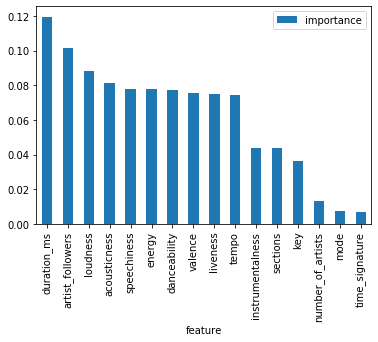

In [46]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(rf.feature_importances_,4)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)
importances.plot.bar()

## Support Vector Machine (SVC)

In [255]:
#C_range = np.logspace(-4, 4, 9)
#gamma_range = np.logspace(-4, 4, 9)
C_range = [1]
gamma_range = [0.1]
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv = 7)
grid.fit(x_train, y_train)
print(grid.best_params_)

C:\Users\eskil\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 1, 'gamma': 0.1}
86.68


In [96]:
rbf_svc = SVC(kernel='rbf', C = 1, gamma = 0.1)
rbf_svc.fit(x_train, y_train)
predictions = rbf_svc.predict(x_test)

acc_svc = round(rbf_svc.score(x_test, y_test) * 100, 2)
prec_svc = precision_score(y_test, predictions) * 100
recall_svc = recall_score(y_test, predictions) * 100

print("accuracy:", acc_svc)
print("Precision:", prec_svc)
print("Recall:", recall_svc)

accuracy: 79.87
Precision: 98.1651376146789
Recall: 60.55724858511101


## Best model

In [49]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest', 'Support Vector Machine'],
    'Accuracy': [acc_log, acc_rf, acc_svc], 
    'precision': [prec_log, prec_rf, prec_svc], 
    'recall': [recall_log, recall_rf, recall_svc]
})
result_df = results.sort_values(by='Accuracy', ascending=False)
result_df.head(9)

,Model,Accuracy,precision,recall
1,Random Forest,87.97,99.097065,76.447540
0,Logistic Regression,85.09,100.000000,68.088811
2,Support Vector Machine,79.87,98.165138,60.557249


In [76]:
x_not_scaled.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,chorus_hit,sections
0,0.741,0.626,1,-4.826,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,41.18681,10
1,0.447,0.247,5,-14.661,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,33.18083,9
2,0.550,0.415,9,-6.557,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,44.89147,9
3,0.502,0.648,0,-5.698,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,29.52521,7
4,0.807,0.887,1,-3.892,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,24.99199,8


In [39]:
frame = pd.DataFrame(x, columns = x_not_scaled.columns)
frame.head()

NameError: name 'x_not_scaled' is not defined